In [1]:
### import necessary packages ###
#%matplotlib notebook
import matplotlib.pylab as plt  ##plotting 
from edited_rawice import *            ##all modules from rawice.py
import warnings
import numpy as np
import os
from scipy.optimize import curve_fit

warnings.filterwarnings('ignore')

In [2]:
## location of raw acq data
notebook_path = os.path.abspath("post_restart_6_29.ipyn")
folder_path = os.path.join(os.path.dirname(notebook_path), "post_restart_6_29/")
print(folder_path)
path = os.path.join(os.path.dirname(notebook_path), "post_restart_6_29/000000_maser.h5")

#path = "/Users/rowlandskc/WVU/rawadc/000040.h5"
#folder_path = "/Users/rowlandskc/WVU/rawadc"



## load data from file to object 'acq'
acq = raw_acq(path)
#help(raw_acq)
acq.adc_input

#set the input 
tm4_input = [0,15,12]

/Users/rowlandskc/WVU/post_restart_6_29/
Loaded raw acq HDF5 file ... 


In [3]:
tm4 = acq.check_input(tm4_input)
tm4.inspect_maser()

Checking input [0, 15, 12] ... 
-2.866440362853661


In [4]:
tm4.get_curve_fit()

length of single_input.time_streams: 65536
single_input.phase_unwrapped length: 65536


should take around 35 minutes if the time to process it is the same as 487 length

size of n_snapshots: 1
# of snapshots: 65536
ype of snapshots: <class 'int'>
size of tau_shift: 65536
length of tau_shift: 65536
type tau_shift: <class 'numpy.ndarray'>
-0.2873071909108437
size of n_snapshots_array: 65536


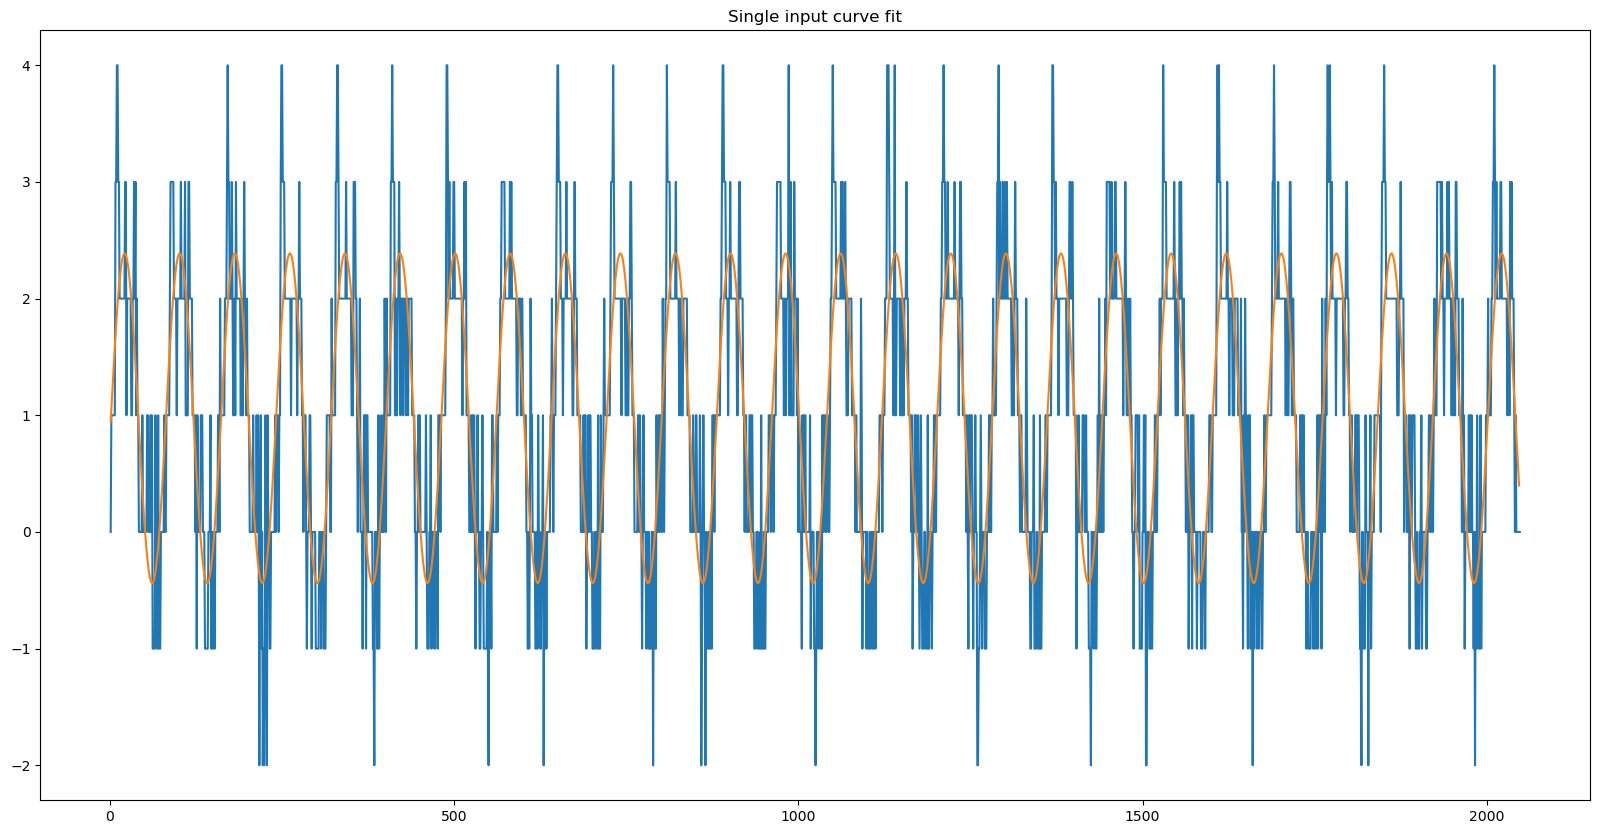

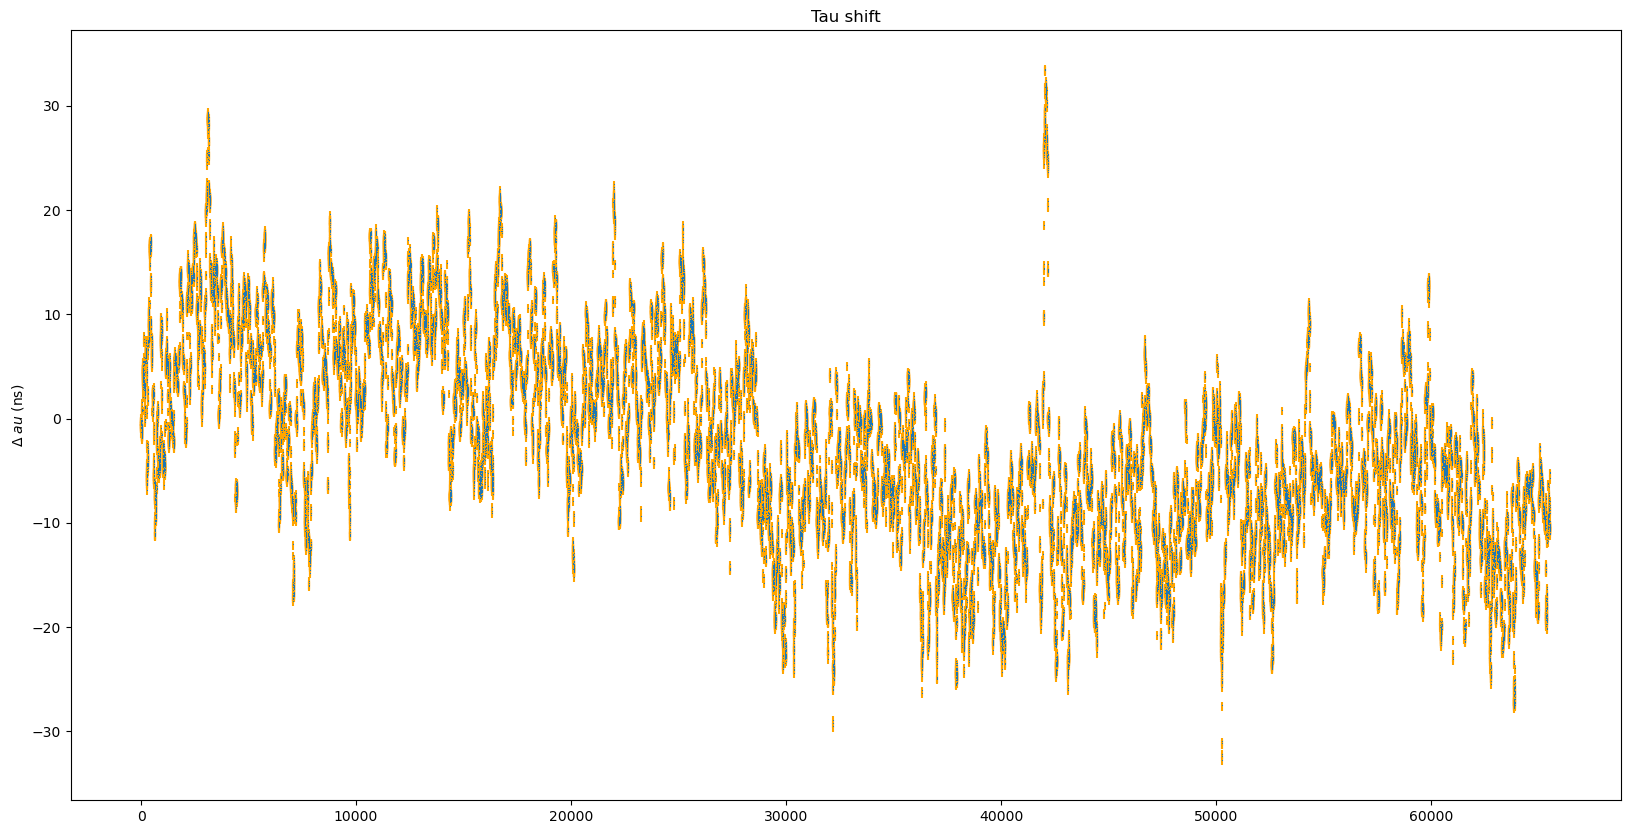

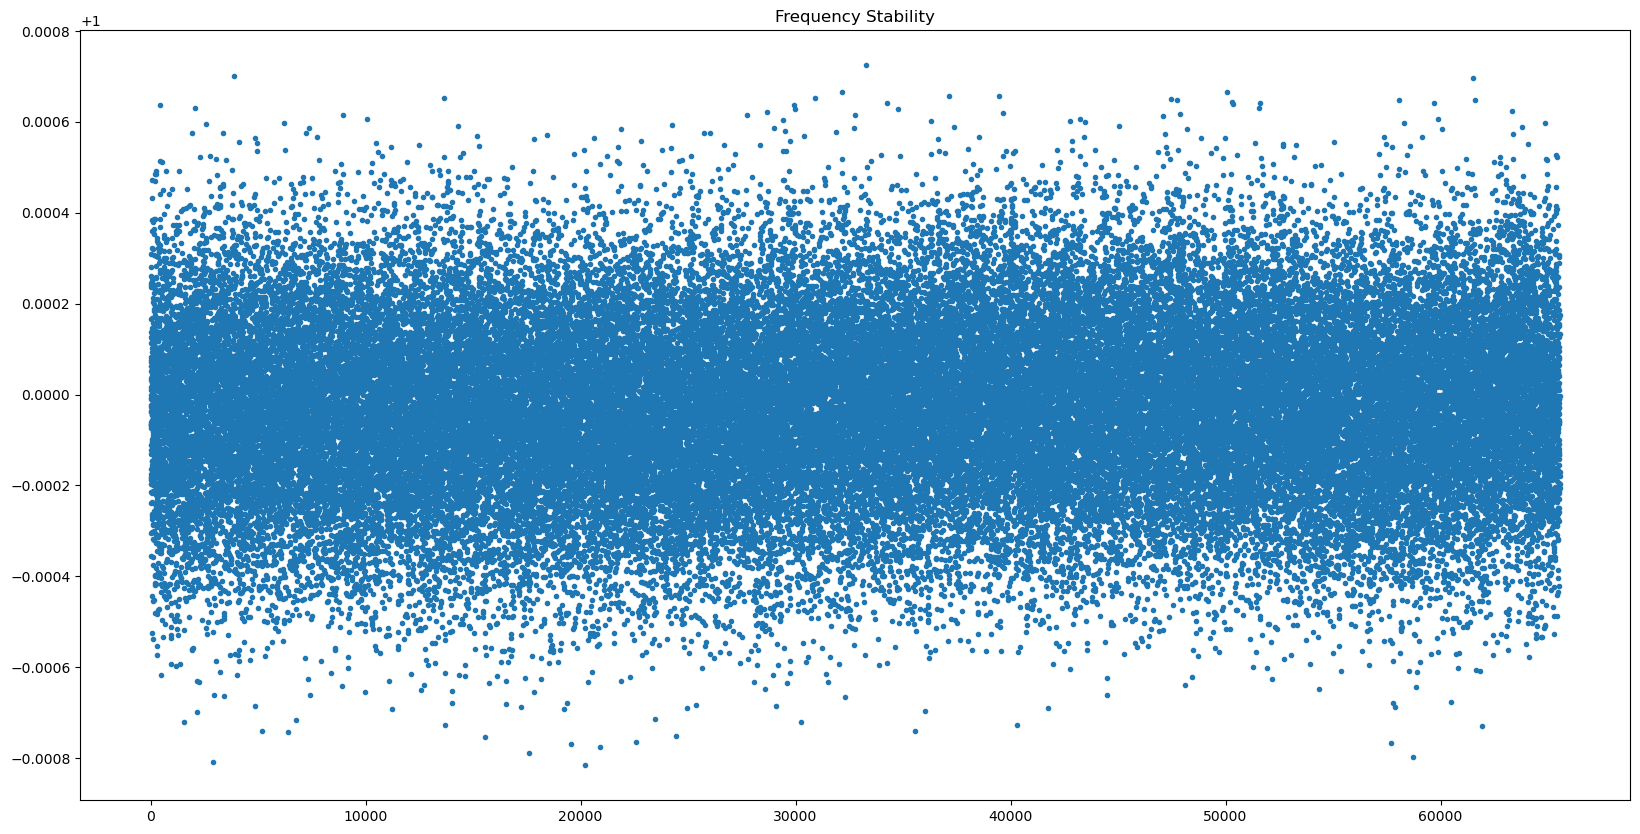

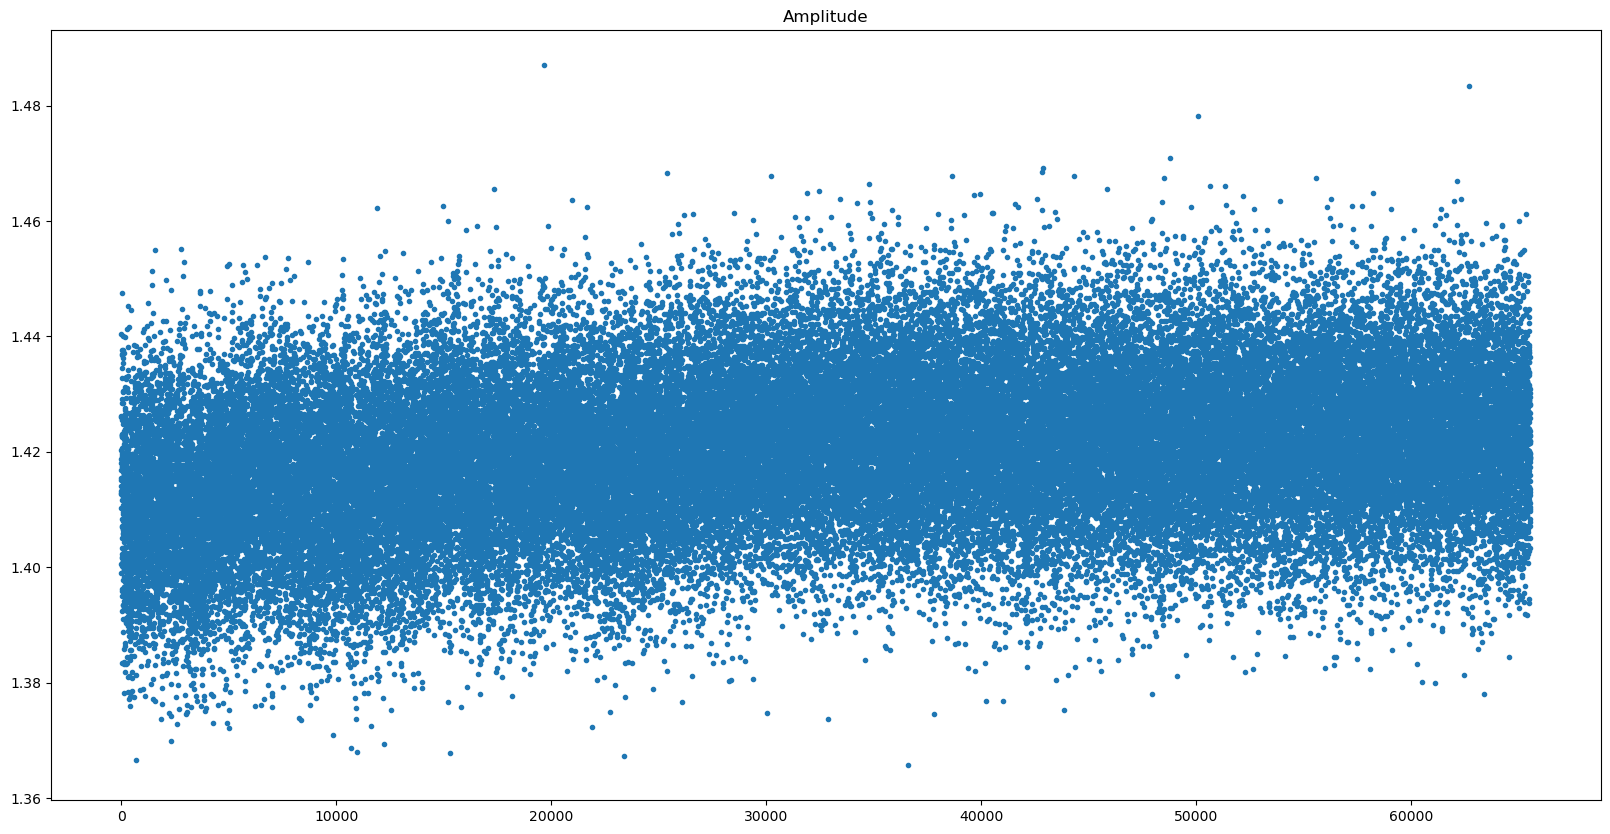

In [5]:
tm4.get_single_curve_fit(i=0)

In [6]:
tm4_clock = analyse_maser(folder_path, tm4_input)

/Users/rowlandskc/WVU/post_restart_6_29/000000_maser.h5
/Users/rowlandskc/WVU/post_restart_6_29/000001_maser.h5
2
Loaded raw acq HDF5 file ... .....................................................................] 0/2
Checking input [0, 15, 12] ... 
-2.866440362853661
2
Checking input [0, 15, 12] ... ###########################........................................] 1/2
-2.866440362853661
2
Done Computing Delay: ############################################################################] 2/2

DONE reading files and getting delays


len timeaxis: 131072
len detrended: 131072


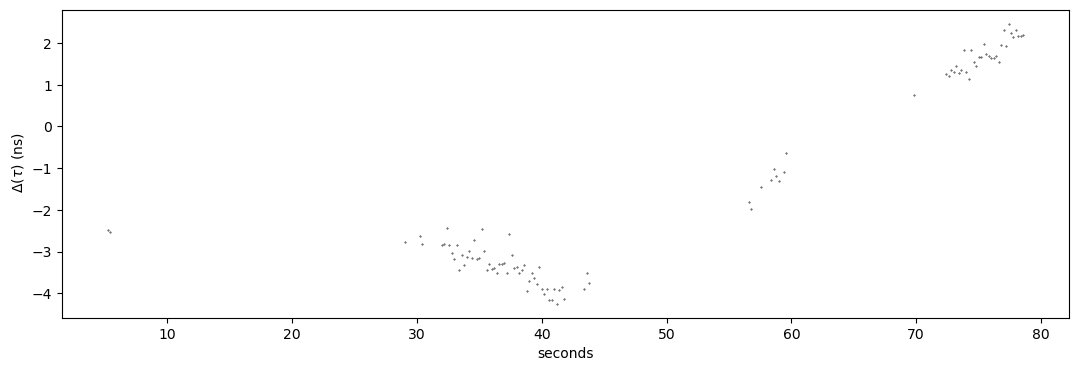

In [7]:
tm4_clock.plot_delays()
#plt.savefig("6_29_23_maser_delays.pdf", format="pdf")

length of single_input.time_streams: 65536
single_input.phase_unwrapped length: 65536
size of n_snapshots: 1
# of snapshots: 65536
ype of snapshots: <class 'int'>
size of tau_shift: 65536
length of tau_shift: 65536
type tau_shift: <class 'numpy.ndarray'>
-0.2873071909108437
size of n_snapshots_array: 65536


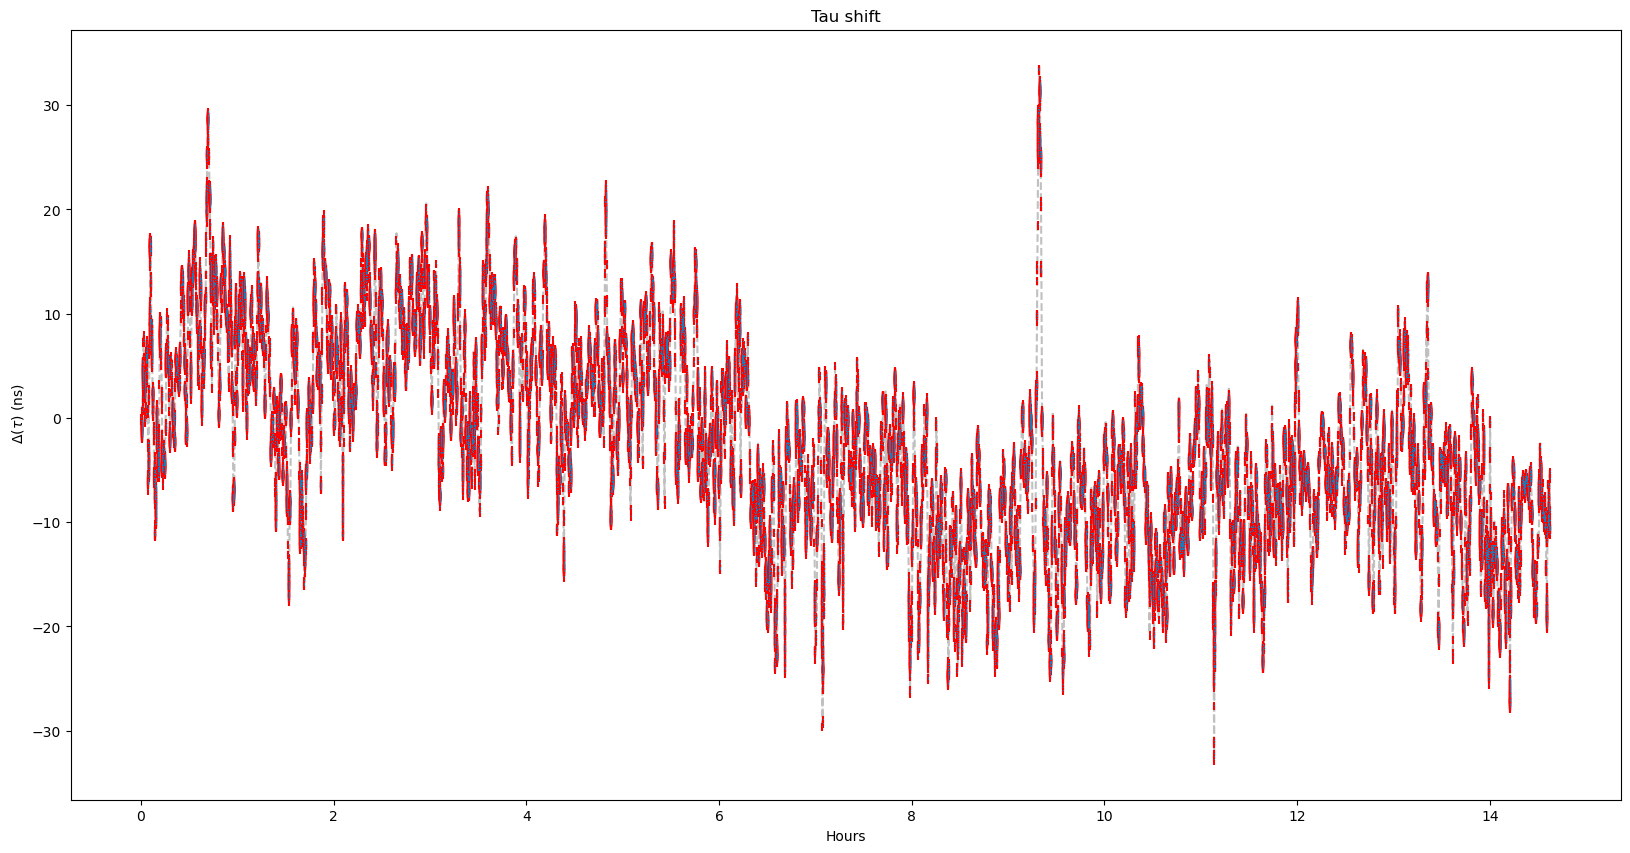

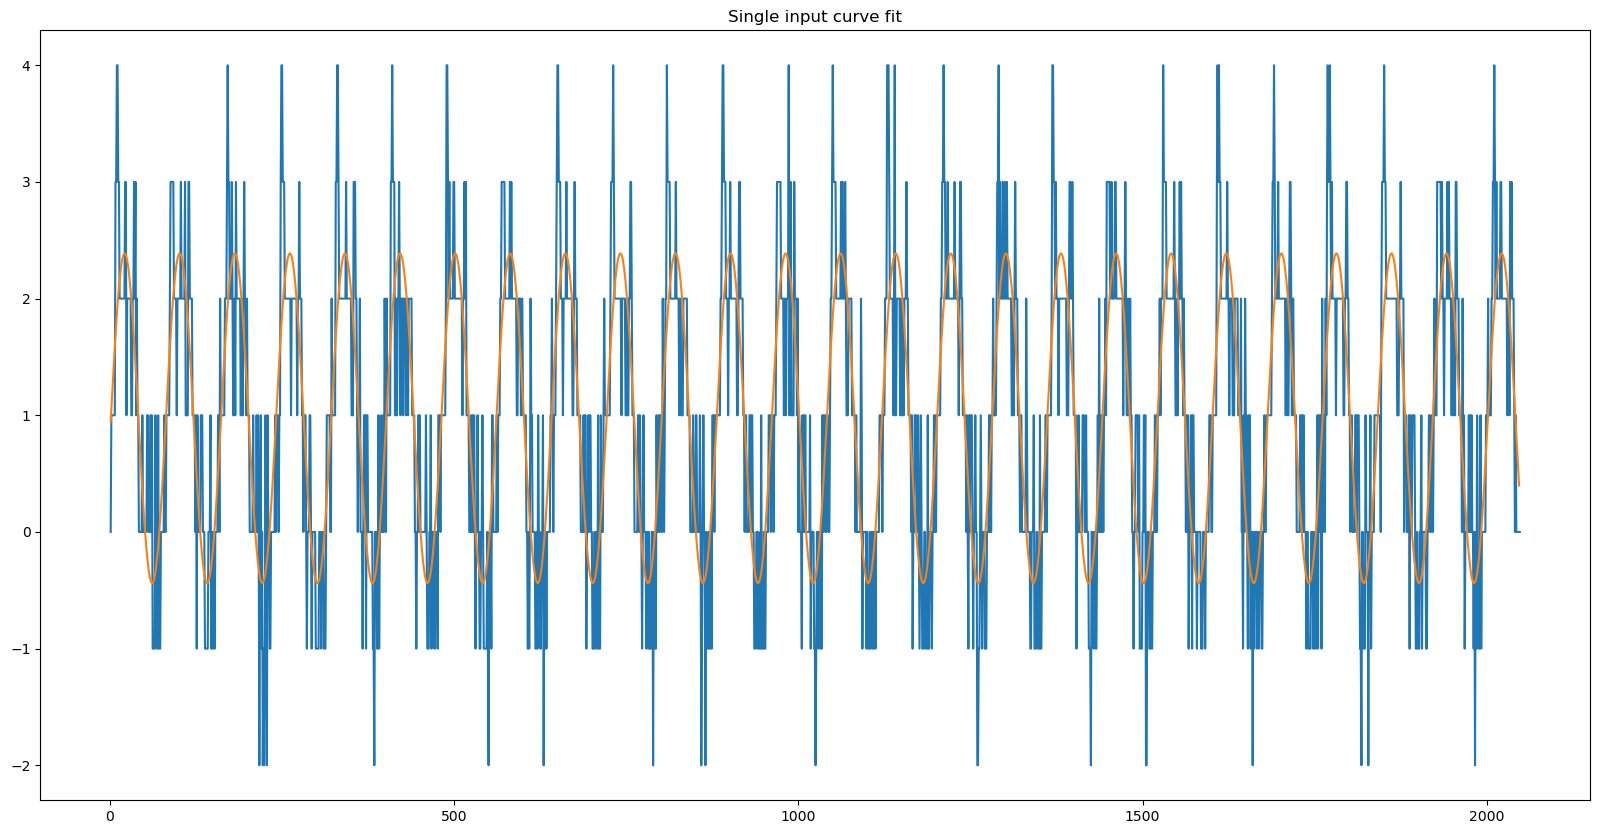

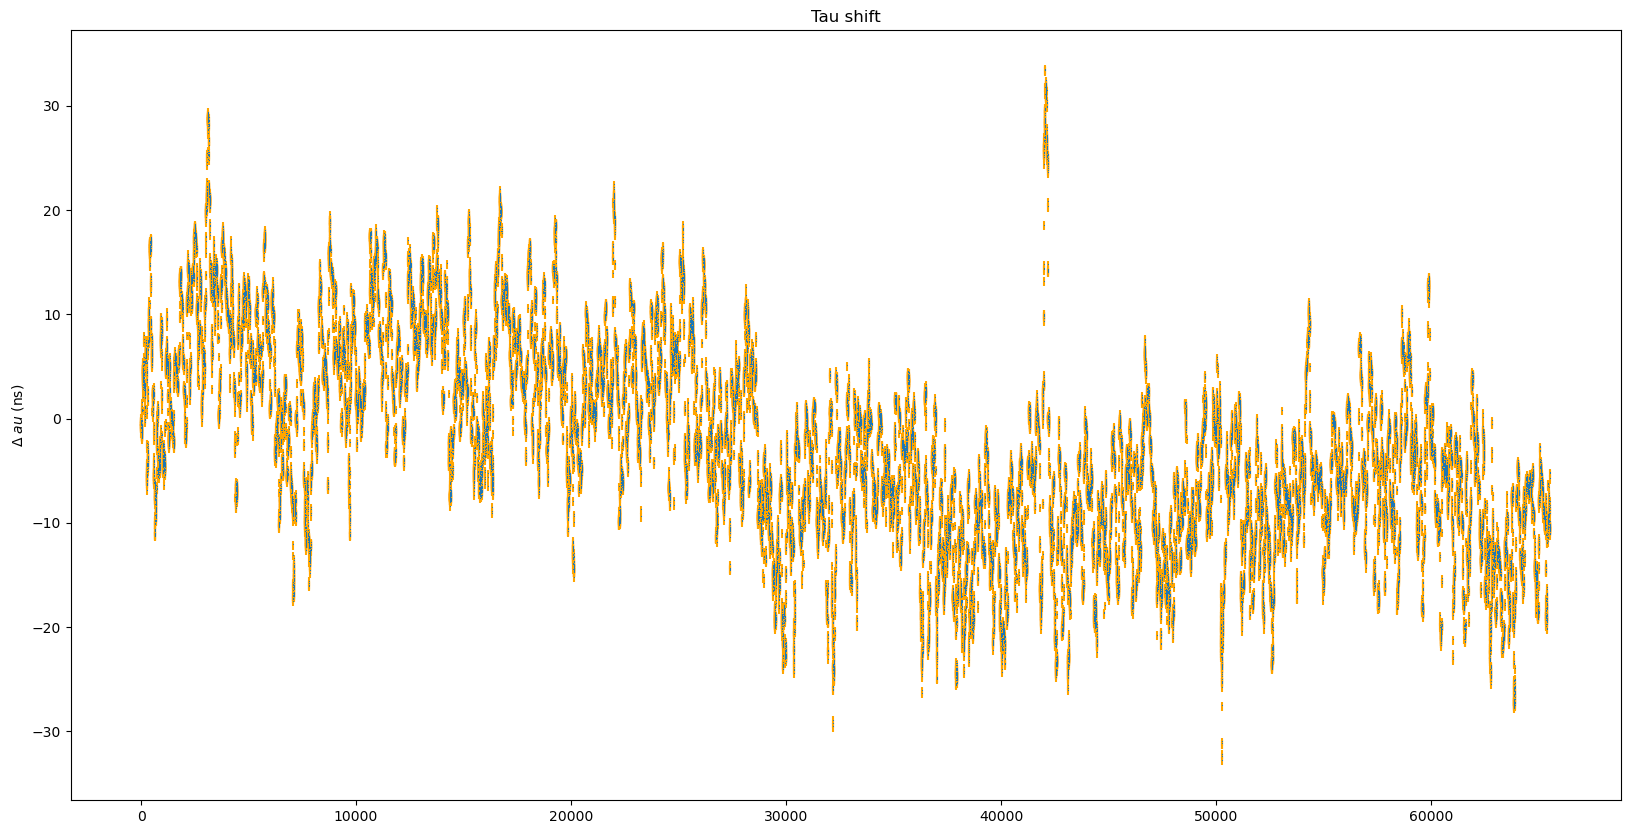

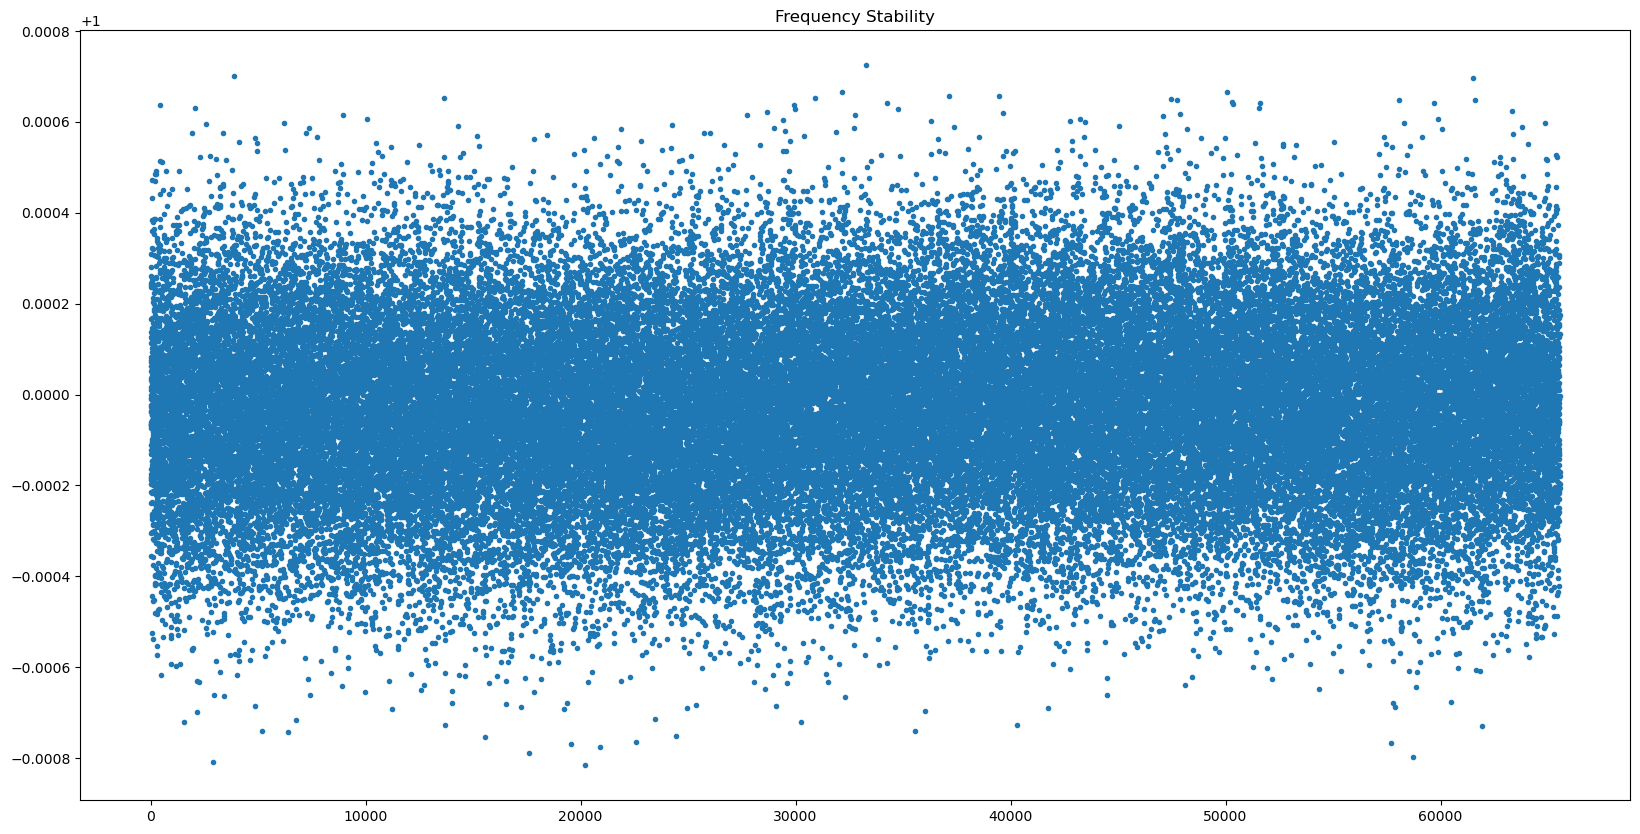

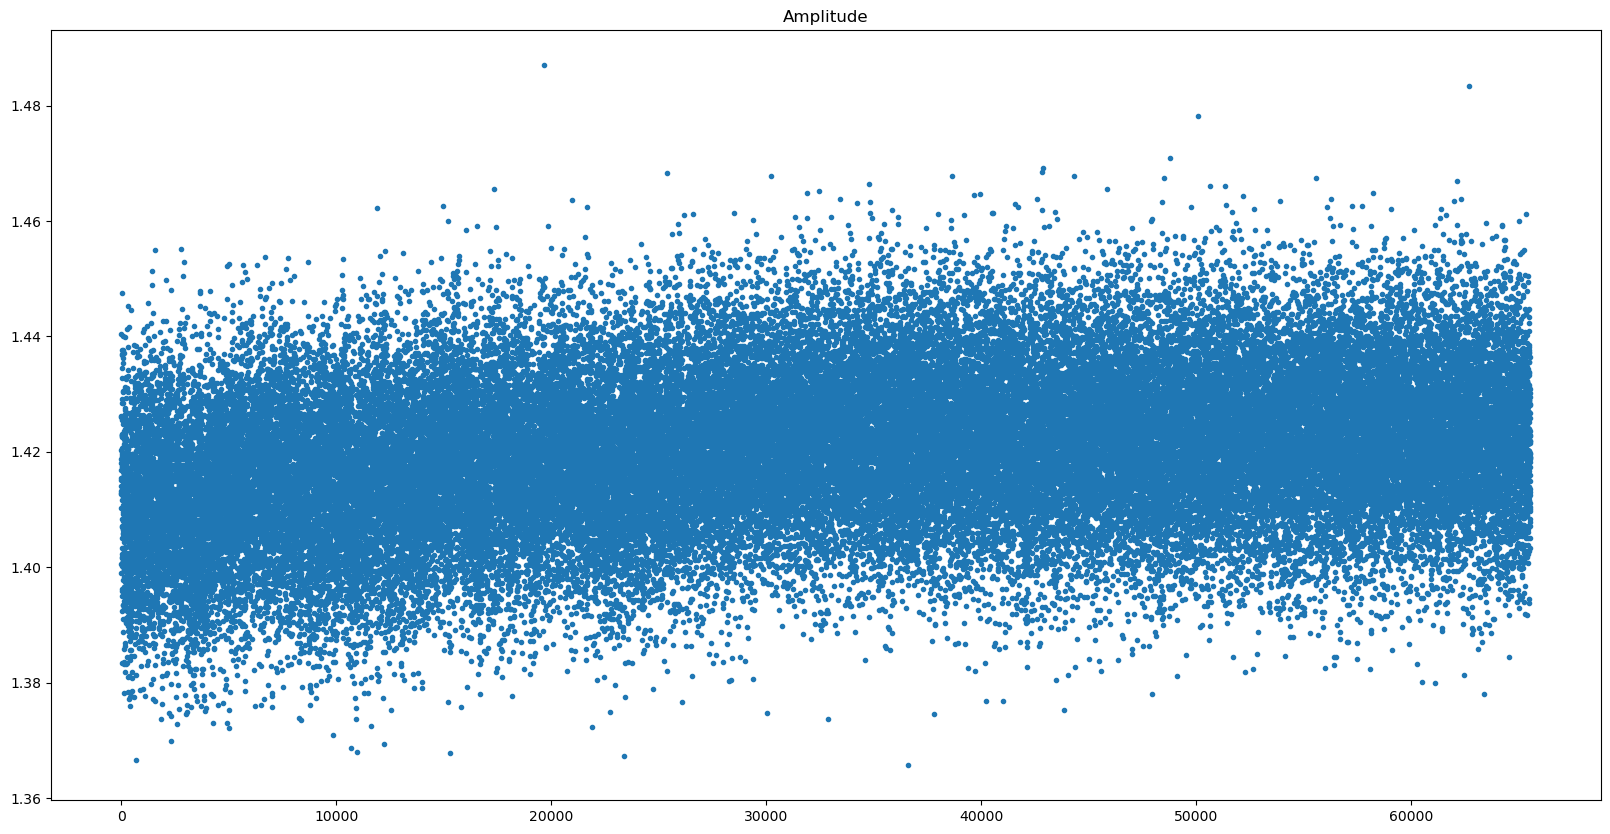

In [8]:
xlist = [val for val in range(0+1, 65536)]#used to be 2049

xval = [(val*(1.25e-9)/60/60) for val in xlist]

fig, ax = plt.subplots(figsize=(20,10))      #HEY LOOK AT THIS!!!!
#[:512] before
plt.plot(tm4_clock.fpgatime[:65536]*2.56e-6/60/60, 10e8*((tm4_clock.taus[:65536])-tm4_clock.taus[0]), c = 'silver', ls="--")#, marker = ','
ax.errorbar(tm4_clock.fpgatime[:65536]*2.56e-6/60/60, (np.array(tm4.tau_shift[:65536])-tm4.tau_shift[0]), yerr=tm4.tau_err[:65536], fmt=',', ecolor='red')
ax.set_title('Tau shift')
plt.xlabel("Hours")
plt.ylabel(r" $\Delta(\tau)$ (ns)")
plt.savefig("Maser_tau_shift.pdf", format="pdf")
tm4.get_curve_fit()
#tm4.get_single_curve_fit(i=0)

In [9]:
tm4_clock.taus

array([-4.56208153e-08, -4.56587106e-08, -4.58951692e-08, ...,
       -5.59848541e-08, -5.62086178e-08, -5.62176464e-08])

In [10]:
tm4.tau_shift

[0.0,
 -0.2873071909108437,
 -0.6606879140690984,
 -0.27308749844607644,
 -0.3443186515644212,
 -0.8924657093343464,
 -0.5719180085466552,
 -0.3371825797153234,
 -0.7599048726604669,
 -0.29598529653999983,
 -0.6086307004671551,
 -0.4749212241817589,
 -1.4335039806224987,
 -0.9661931542568768,
 -0.9751041796162808,
 -0.9504022091080009,
 -0.9264180107389643,
 -0.7637454931001443,
 -0.5740312402258072,
 -1.0543369050070743,
 -0.9848581427155345,
 -0.26004615668073255,
 -0.3285746118942645,
 -0.8934262491474444,
 -0.9968101039877043,
 -1.1525823006631162,
 -0.5803584772597833,
 -1.3053546271380223,
 -0.8421762755266502,
 -0.7986827444522117,
 -0.7730293954442462,
 -1.1903575787233514,
 -0.8420387548082882,
 -0.7892191331620338,
 -0.6920177225769502,
 -0.7391372762105937,
 -0.8569503186600119,
 -1.413152317295424,
 -1.144006262841528,
 -1.6089157042469504,
 -1.5050236987620194,
 -1.250656615011235,
 -0.9912516051437423,
 -1.9947805984100306,
 -1.0476475883478442,
 -1.5049081481568853,
 -1.

In [11]:
#hdf5_file_name = 'path_to_maser_file/00005_maser.h5'
#file = h5py.File(path, "r")
'''
timestamp = file["timestamp"][:, 0]
uniq_fpga_count, iuniq, itime = np.unique(
    timestamp["fpga_count"], return_index=True, return_inverse=True
)
ctime = timestamp["ctime"][iuniq]

fpga = timestamp["fpga_count"][iuniq]
ntime = ctime.size
timestream = file["timestream"][:]

npacket, nsample = timestream.shape
data = np.zeros((1, ntime, nsample), dtype=timestream.dtype)
data[0,:,:]=timestream

y=data[0]
plt.plot(y[4])


gca().xaxis.set_major_locator(MaxNLocator(5))
grid()
plt.xlim(0, 200)
title('Frame %i (LSB)'%4)
xlabel('Sample number')
'''

'\ntimestamp = file["timestamp"][:, 0]\nuniq_fpga_count, iuniq, itime = np.unique(\n    timestamp["fpga_count"], return_index=True, return_inverse=True\n)\nctime = timestamp["ctime"][iuniq]\n\nfpga = timestamp["fpga_count"][iuniq]\nntime = ctime.size\ntimestream = file["timestream"][:]\n\nnpacket, nsample = timestream.shape\ndata = np.zeros((1, ntime, nsample), dtype=timestream.dtype)\ndata[0,:,:]=timestream\n\ny=data[0]\nplt.plot(y[4])\n\n\ngca().xaxis.set_major_locator(MaxNLocator(5))\ngrid()\nplt.xlim(0, 200)\ntitle(\'Frame %i (LSB)\'%4)\nxlabel(\'Sample number\')\n'

In [12]:
'''
file.close()
file = h5py.File(path, "r")

timestamp = file["timestamp"][:, 0]
uniq_fpga_count, iuniq, itime = np.unique(
    timestamp["fpga_count"], return_index=True, return_inverse=True
)
ctime = timestamp["ctime"][iuniq]

fpga = timestamp["fpga_count"][iuniq]
ntime = ctime.size
timestream = file["timestream"][:]
npacket, nsample = timestream.shape
new_data = np.zeros((1, ntime, nsample), dtype=timestream.dtype)

new_data[0,:,:]=timestream

y=new_data[0]
plt.plot(y[4])

plt.grid()
plt.xlim(0, 500)
plt.title('Frame %i (LSB)'%4)
plt.xlabel('Sample number')
''''''

SyntaxError: incomplete input (4049310889.py, line 26)

In [ ]:
'''
Nfft = 2400 # Use an fft length such that the 10MHz harmonics align perfectly with one of the FFT bins
f_MHz = 800. - np.arange(Nfft//2)*400./(Nfft/2)

maser_rms = np.std(y, axis=1)
maser_fft = np.fft.fft(y - np.mean(y, axis=1)[:, np.newaxis], axis=1, n=Nfft)[:, :Nfft//2]
maser_phase = np.angle(maser_fft)
maser_mag = np.abs(maser_fft)
maser_fft.shape, y.shape
maser_phase_n = maser_phase - maser_phase[0][np.newaxis, :]


plt.plot(f_MHz, maser_mag[4])
''''